# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/yangzhibo5947/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


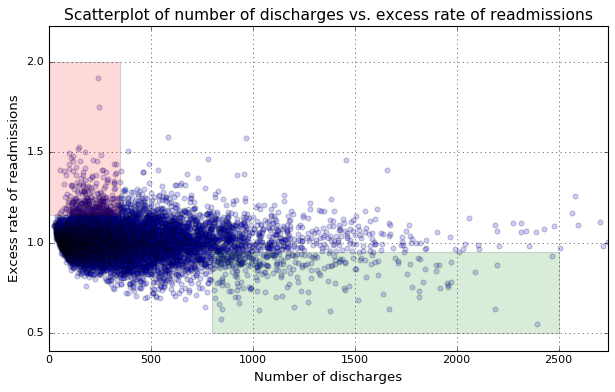

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

### About scatter plot

Before we start, I want to talk about the scatter plot first.

It is kind of easy to make a conclusion according to the scatter plot that rate of readmissions is trending down with increasing number of discharges.

From my point of view, scatter plot can convey more visualized results than text. However, it can also be misleading sometimes. For example, in this project, a strong negative relationship seems exist between number of discharges and readmission rates. Actually, the relationship is so weak that we can even ignore it. 

In order to convey precise information, it is very important to choose proper scale of axis and size of plots. 

Here is the scatter plot I made:

In [101]:
#Select only columns we need
test_data = clean_hospital_read_df[['Excess Readmission Ratio', 'Number of Discharges']][81:-3]
test_data.head()

,Excess Readmission Ratio,Number of Discharges
1832,1.0914,25
1699,1.0961,27
1774,1.0934,28
1853,1.0908,29
1290,1.1123,30


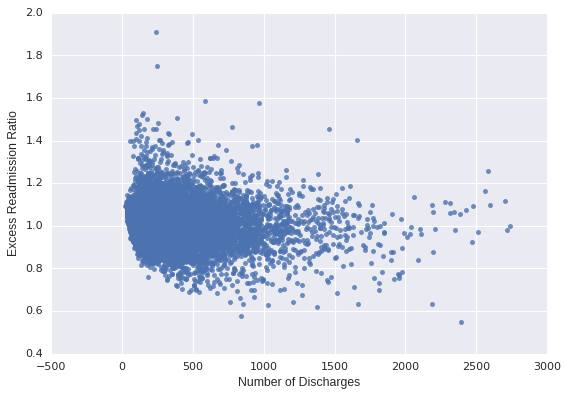

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
_ = sns.regplot(test_data['Number of Discharges'], test_data['Excess Readmission Ratio'],fit_reg=False)

By choosing difference scale of axis, this plot looks very different from the latter one. 

According to this scatter plot, there is no obvious correlation between number of discharges and readmission rates. 

## Test initial observations based on the plot above

$H$: Overall, rate of readmissions is trending down with increasing number of discharges 

To test $H$ statement, first build a linear regression model for this data set.

In [30]:
from scipy import stats
x = test_data['Number of Discharges']
y = test_data['Excess Readmission Ratio']
slope, intecept, r_value, p_value, std_err = stats.linregress(x, y)
print("The slope is {0:.6f}".format(slope))
print("p-value is {}".format(p_value))

The slope is -0.000029
p-value is 1.5022756426614974e-23


Since the slope is negative, it means inversely proportional relationship do exist between number of charges and reamission rates. And also since the p-value is really small which means inverse proportion do not happen by chance.

However, since the negative relationship between Number of Discharges and Excess Readmission Ratio is too weak, it is still not 100% safe to say $H$ is true

## Test statistics claims


   * $S_1$: In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
   * $S_2$: In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1


In [32]:
df1 = test_data[test_data['Number of Discharges'] < 100]
df2 = test_data[test_data['Number of Discharges'] > 1000]

In [51]:
mean1 = np.mean(df1['Excess Readmission Ratio'])
lar_1 = len(df1[df1['Excess Readmission Ratio'] > 1])/len(df1)
print("----------------------------------------------------------")
print("In hospitals with number of discharges < 100: ")
print("Mean of excess readmission rate is {0:.3f}".format(mean1))
print("Proportion of having excess readmission rate greater than 1: {:.2f}%".format(100*lar_1))
print("----------------------------------------------------------")
print("In hospitals with number of discharges > 1000: ")
mean2 = np.mean(df2['Excess Readmission Ratio'])
lar_2 = len(df2[df2['Excess Readmission Ratio'] > 1])/len(df2)
print("Mean of excess readmission rate is {0:.3f}".format(mean2))
print("Proportion of having excess readmission rate greater than 1: {:.2f}%".format(100*lar_2))

----------------------------------------------------------
In hospitals with number of discharges < 100: 
Mean of excess readmission rate is 1.023
Proportion of having excess readmission rate greater than 1: 63.22%
----------------------------------------------------------
In hospitals with number of discharges > 1000: 
Mean of excess readmission rate is 0.979
Proportion of having excess readmission rate greater than 1: 44.57%


From above results, the two statements $S_1$ & $S_2$ are True

## Test conclusion

From above linear regression model, we already know there's no significant correlation between hospital capacity and readmission rates. And here, to make sure of the results, let's do more calculation:

In [53]:
test_data.corr()

,Excess Readmission Ratio,Number of Discharges
Excess Readmission Ratio,1.000000,-0.093096
Number of Discharges,-0.093096,1.000000


From the correlation matrix, correlation of -0.09 means a very weak negative relationship between number of discharges and readmission rates, which means we can say that there is no significant correlation between hospital capacity and readmission rates.

## Test Recommendation

To test the recommendation here, we need to figure out what they are recommending.

They think that a difference do exist between small capacity hospitals (< 300) and large capacity hospitals.

So null hypothesis could be raised:

Null Hypothesis: No difference in the mean of readmission rates between small capacity hospitals and large capacity hospitals
* $H_0: \mu_s - \mu_l = 0$

Alternative Hypothesis: There is a difference in the mean of readmission between samll capacity hospitals and high capacity hospitals
* $H_1: \mu_s - \mu_l \neq 0$

### Statistical significance

In [59]:
#compute necessary parameters
df_300_1 = test_data[test_data['Number of Discharges'] < 300]
df_300_2 = test_data[test_data['Number of Discharges'] > 300]
mean1 = np.mean(df_300_1['Excess Readmission Ratio'])
mean2 = np.mean(df_300_2['Excess Readmission Ratio'])
mean = mean1 - mean2
mu = 0
std1 = np.std(df_300_1['Excess Readmission Ratio'])
std2 = np.std(df_300_2['Excess Readmission Ratio'])
sigma1 = std1/np.sqrt(len(df_300_1))
sigma2 = std2/np.sqrt(len(df_300_2))
sigma = np.sqrt(sigma1**2 + sigma2**2)

In [102]:
z = (mean - mu)/sigma
print("z statistic: {0:.5f}".format(z))

z statistic: 8.27443


For significance level $\alpha = 0.01$,we get $z_\alpha = 2.34$  

In [62]:
alpha = 0.01
z_alpha = 2.34

Since the z value is way larger than $z_\alpha$ at significance level $\alpha = 0.01$, it is safe to reject $H_0$.

There is a difference in mean of readmission rate between small capacity hospitals and high capacity hospitals

In [84]:
print("99% confidence interval: ({:.5f}, {:.5f})".format((mean - z_alpha*sigma), (mean + z_alpha*sigma)))

99% confidence interval: (0.01031, 0.01845)


This means we are 99% confident that difference in mean of readmisiion rate will be in (0.01031, 0.01845)

Till now, we have shown that statistically, small capacity hospitals have higher mean of readmission than high capacity hospitals. However, since the difference is not large, is that difference make any effects?

Therefore, practical significance could be introduced to this problem.

### Practical significance

In [92]:
Sp = np.sqrt((std1**2*(len(df_300_1))+std2**2*(len(df_300_2)))/(len(df_300_1)+len(df_300_2)-2))
d = (mean1-mean2)/Sp

In [94]:
print("Effect size is: {0:.5f}".format(d))

Effect size is: 0.15687


The effect size $d = 0.15687$ indicates a nonoverlap of around 10% in the two distributions.

Although the difference between two groups of hospitals do exist, it has really small meaningful effect. Which means it is still safe to say **there is NO difference in mean of readmission rates between small capacity hospitals and high capacity hospitals.**

### Comparasion and Conclusion

In this senario, according to my analysis, I do not think recommendations from the report will be effective. Since I cannot find any meaningful difference between the two groups of hospitals.

Statistical significance and practical significance are similar in concept, but could present totally different results on the same dataset. Sometimes difference between two groups do exist, but we could not just make decision on whether there is a difference --- in more senarios, although there is a difference, maybe the difference is not meaningful at all.

So, from my point of view, practical significance can be a complementary method of statistical significance when doing two-sample test.